In [281]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G



In [282]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))




In [283]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

In [284]:

keep_en = []
def transform_now(data):
    keep_en.append(LabelEncoder())
    data[:,0]=keep_en[0].fit_transform(data[:,0])


In [285]:
    
def fill_value_miss(miss_data):
#     print(miss_data)
    df = pd.DataFrame(miss_data)
#     print(df.isnull().sum())
    df.fillna(method='backfill',inplace=True)
    df = df.to_numpy()
    transform_now(df)
    return df

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     data[:,0]=keep_en[0].inverse_transform(xx)




def find_value_miss(G):
     "DayKey","ProductGroup","Area","Channel"
     print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0,1],G[0,2],G[0,3]))
     print("start : {}, end : {} ".format(G[0, 0],G[-1, 0]))
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[origin_index,0] == date_full[i]:   #G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = None
               count_miss_day += 1
     # print(miss_data)
     miss_data = fill_value_miss(miss_data)
     # print('missing CumSales of invidual day =',count_miss_day)
     return miss_data

In [286]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 



In [287]:
##### month 1 ##### LinearRegression

A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
plot_st_day = []
plot_stop_day = []
plot_true_day =[]
plot_true_sale =[]
plot_pred = []
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

x_train = info[:10,0]#10 วัน
y_train = info[:10,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[30,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[30,1]


maeLinear = []
mseLinear = []
for i in range (1):
    maeLinear.append(mean_absolute_error([info[30,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[30,1]],pred))
plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[30,1])
plot_pred.append(pred)


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
[6833094.12727273]
0.9870334845564981


In [288]:
##### month 2 ##### linearRegression

# print(info[31:41])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[31:41,0]#10 วัน
y_train = info[31:41,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[58,1]

for i in range (1):
    maeLinear.append(mean_absolute_error([info[58,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[58,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[58,1])
plot_pred.append(pred)

[6143987.16363636]
0.995212653093003


In [289]:
##### month 3 ##### linearRegression

# print(info[59:90])
# print(All_Group[A][30:56]) # 30 to 56

x_train = info[59:69,0]#10 วัน
y_train = info[59:69,1]
dtree =  LinearRegression   ()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[89,1]
# print(info[89])
# print(info[59:69])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[89,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[89,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[89,1])
plot_pred.append(pred)

[6038259.10909091]
0.9926201003402282


In [290]:
##### month 4 ##### linearRegression

# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[90:100,0]#10 วัน
y_train = info[90:100,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[119,1]
# print(info[90:100])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[119,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[119,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[119,1])
plot_pred.append(pred)

[7520217.26060606]
0.9923663618578752


In [291]:
##### month 5 ##### linearRegression

# print(info[121:151])
# print(All_Group[A][114:142]) 


x_train = info[121:131,0]#10 วัน
y_train = info[121:131,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[150,1]
# print(info[121:131,0])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[150,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[150,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[150,1])
plot_pred.append(pred)

[5999556.7030303]
0.9868147551193365


In [292]:
##### month 6 ##### linearRegression

# print(info[151:181])
# print(All_Group[A][114:142]) 


x_train = info[151:161,0]#10 วัน
y_train = info[151:161,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[180,1]
# print(info[180,0])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[180,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[180,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[180,1])
plot_pred.append(pred)

[6322524.26666667]
0.9957167199894305


In [293]:
##### month 7 ##### linearRegression

# print(info[181:212])
# print(All_Group[A][114:142]) 


x_train = info[181:191,0]#10 วัน
y_train = info[181:191,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[211,1]
# print(info[211])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[211,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[211,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[211,1])
plot_pred.append(pred)

[7006758.07272728]
0.9931523926712571


In [294]:
##### month 8 ##### linearRegression

# print(info[212:243])
# print(All_Group[A][114:142]) 


x_train = info[212:222,0]#10 วัน
y_train = info[212:222,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[242,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[242,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[242,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[242,1])
plot_pred.append(pred)

[7082203.43636364]
0.9963020028752657


In [295]:
##### month 9 ##### linearRegression

# print(info[243:273])
# print(All_Group[A][114:142]) 


x_train = info[243:253,0]#10 วัน
y_train = info[243:253,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[272,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[272,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[272,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[272,1])
plot_pred.append(pred)


[6419878.85454546]
0.9962758084557758


In [296]:
##### month 10 ##### linearRegression

# print(info[273:304])
# print(All_Group[A][114:142]) 


x_train = info[273:283,0]#10 วัน
y_train = info[273:283,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[303,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[303,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[303,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[303,1])
plot_pred.append(pred)


[6980619.19999999]
0.9956977558152011


In [297]:
##### month 11 ##### linearRegression

# print(info[303:334])
# print(All_Group[A][114:142]) 


x_train = info[303:313,0]#10 วัน
y_train = info[303:313,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[333,1]
# print(info[333])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[333,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[333,1]],pred))

plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(info[333,1])
plot_pred.append(pred)


[-2115849.89090909]
0.05764045959799691


In [302]:
##### month 12 ##### linearRegression
# print(info[334:365])
# print(All_Group[A][114:142]) 
x_train = info[334:344,0]#10 วัน
y_train = info[334:344,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[364,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[364,1]
print(info[364,1])


# for i in range (1):
#     maeLinear.append(mean_absolute_error([info[364,1]],pred))
# for i in range (1):
#     mseLinear.append(mean_squared_error([info[364,1]],pred))

# plot_st_day.append(x_train)
# plot_stop_day.append(y_train)
# plot_true_day.append(x)
# plot_true_sale.append(info[364,1])
# plot_pred.append(pred)



[6700134.23636363]
0.9784325943822219
28777.0


In [299]:
maeLinear = np.array(maeLinear)
mseLinear = np.array(mseLinear)
print(np.average(maeLinear))
print(np.average(mseLinear))

1589823.2666666657
10621252398457.709


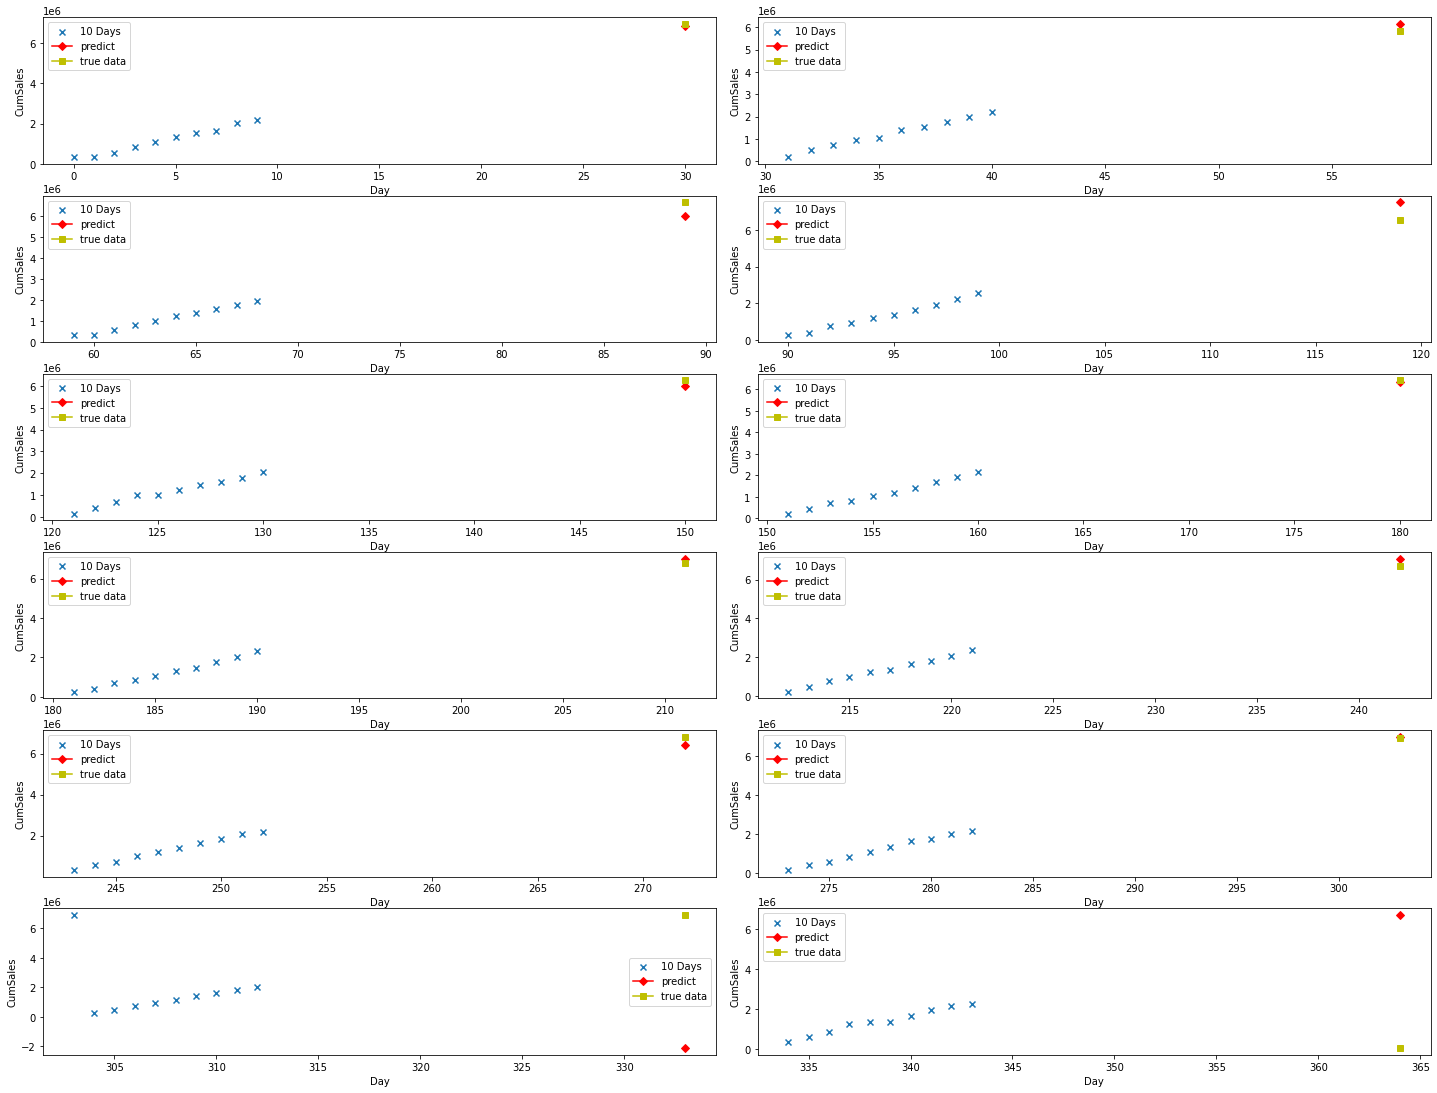

In [301]:
# inverse_d_new(info)
# seaborn
fig,axs = plt.subplots(nrows=6, ncols=2,figsize=(20,15))
plt.tight_layout()
index_for_plot = 0
for i in range(6):
    for j in range(2):
        axs[i,j].scatter(plot_st_day[index_for_plot],plot_stop_day[index_for_plot],marker='x',label='10 Days')
        axs[i,j].plot(plot_true_day[index_for_plot],plot_pred[index_for_plot],marker='D',color='r',label='predict')
        axs[i,j].plot(plot_true_day[index_for_plot],plot_true_sale[index_for_plot],marker='s',color='y',label='true data')
        axs[i,j].set_xlabel('Day')
        axs[i,j].set_ylabel('CumSales')
        axs[i,j].legend(loc='best')
        index_for_plot += 1
   

    